
![Clothing Classifier Model](Clothing%20Classifier%20Model.png)


Fashion Forward is a new AI-based e-commerce clothing retailer.
They want to use image classification to automatically categorize new product listings, making it easier for customers to find what they're looking for. It will also assist in inventory management by quickly sorting items.

As a data scientist tasked with implementing a garment classifier, your primary objective is to develop a machine learning model capable of accurately categorizing images of clothing items into distinct garment types such as shirts, trousers, shoes, etc.

In [53]:
# Run the cells below first

In [54]:
from tensorflow.keras import datasets, layers, models, Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical

In [55]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

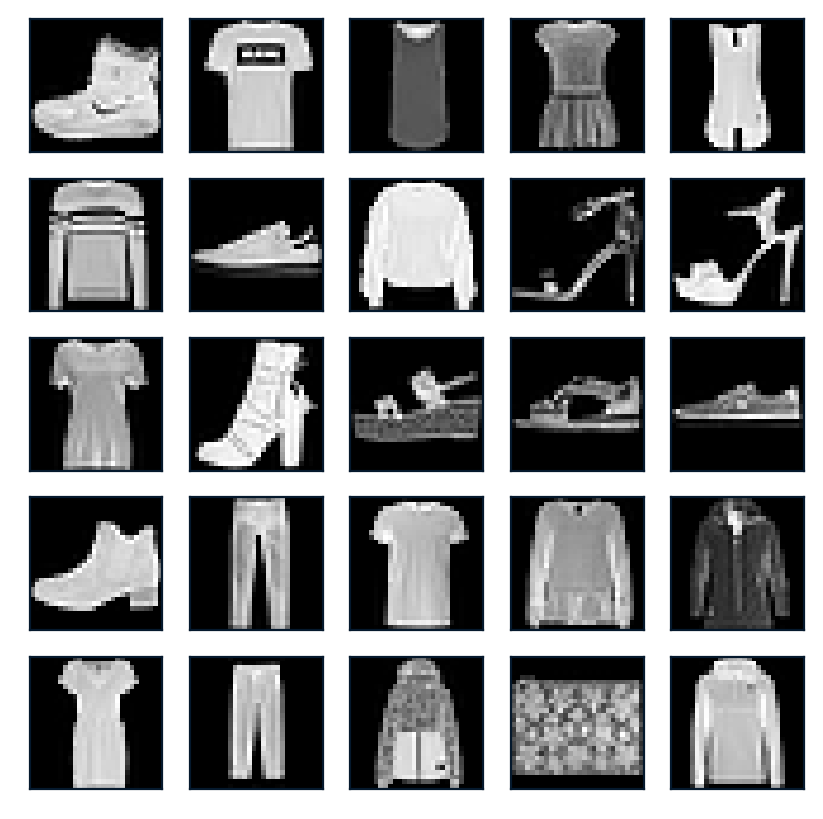

10
28


In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255.0, cmap='gray')
plt.show()

num_classes = len(set(train_labels))
img_size = train_images[0].shape[0]

print(num_classes)
print(img_size)

### Define CNN classifier

In [57]:
cnn_model = Sequential()

# 1st layer
cnn_model.add(Conv2D(32,
                     kernel_size = 3,
                     input_shape=(28, 28, 1),
                     strides = (1,1),
                     activation = 'relu'))

# 2nd layer
cnn_model.add(Conv2D(16,
                     kernel_size = 3,
                     strides = (1,1),
                     activation = 'relu'))

# Flatten the output of the previous layer
cnn_model.add(Flatten())

# End this multiclass model with 10 outputs and softmax
cnn_model.add(Dense(10, activation='softmax'))

### Train CNN classifier

In [58]:
# Compile model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 16)        4624      
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                92170     
                                                                 
Total params: 97,114
Trainable params: 97,114
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [60]:
# Train the model
cnn_model.fit(train_images, y_train, epochs=1)

# Evaluate the model on the test data
scores = cnn_model.evaluate(test_images, y_test)
test_accuracy = scores[-1]
print(f'Test accuracy: {test_accuracy:.2f}')

313/313 [==============================] - 2s 6ms/step - loss: 0.4080 - accuracy: 0.8530
Test accuracy: 0.85
